<h1 style="font-size:3rem;color:orange;">Assignment 3</h1>

# Problem 1

In this problem, we will examine the German Credit dataset that can be found on Webcourses
with the homework in the file SouthGermanCredit.asc. All the column names are in German, but you can
find the English translations of the columns at this site. We are interested in the kredit response, which
indicates if an individual has fulfilled their credit contract. Analyze this dataset by following the steps below:

(a) Load the data using read.table(). Rename the columns with their English names. Split the data
into a training and test set.

In [1]:
#%% Step 1 - import data with custom column names and dropping first column
import pandas as pd;
file_path = 'C:/Users/danma/Downloads/SouthGermanCredit.asc'
colnames=['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'] 
df = pd.read_table(file_path, sep=" ", names=colnames)
df = df.iloc[1: , :]
df.dropna()

del file_path

#%% Step 2 - splits data into x and y

from sklearn.model_selection import train_test_split as TTS;

x = df.loc[:, df.columns != 'credit_risk']
y = df['credit_risk']
#turns y into a 1-d array instead of a dataframe column
y = y.to_numpy()
y = y.ravel()

#splits into training and test data
x_train, x_test, y_train, y_test = TTS(x,y, random_state=42)

#del df, file_path, colnames, x, y #clear data for variable explorer

print("Small Snippets\nX Test:\n",x_test,"Y Test",y_test)
del df, x, y

Small Snippets
X Test:
     status duration credit_history purpose amount savings employment_duration  \
522      4       36              2       2  10974       1                   1   
738      4       18              4       3   1149       4                   3   
741      4       12              2       2   1736       1                   4   
661      2        8              2       3   1414       1                   3   
412      4       24              3       9   2978       5                   3   
..     ...      ...            ...     ...    ...     ...                 ...   
110      4       12              4       6   2012       5                   4   
431      4       30              4       3   4530       1                   4   
78       4       24              4       0   1940       4                   5   
85       4       15              4       2   1520       5                   5   
287      1        6              4       3    338       3                   5   

   

(b) Perform a logistic regression using the full set of features. Comment on relevant features. Narrow
down your features into the most relevant predictors. What are they? Create a reduced model using
the set of features you have identified.

Logistic Regression Results:
status Score: 0.53469
duration Score: -0.02814
credit_history Score: 0.35465
purpose Score: 0.02235
amount Score: -0.00010
savings Score: 0.27534
employment_duration Score: 0.11615
installment_rate Score: -0.32060
personal_status_sex Score: 0.25849
other_debtors Score: 0.26841
present_residence Score: 0.04299
property Score: -0.12957
age Score: 0.00991
other_installment_plans Score: 0.17283
housing Score: 0.21558
number_credits Score: -0.20652
job Score: 0.01089
people_liable Score: -0.02373
telephone Score: 0.35873
foreign_worker Score: -0.84162


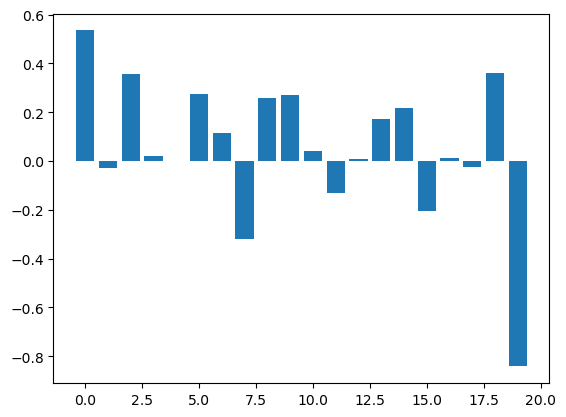

In [2]:
#%% Step 3 - logistic regression full set
print("Logistic Regression Results:")
from sklearn.linear_model import LogisticRegression;
from matplotlib import pyplot
#using newton-cg to mitigate error with number of samples on default
completemodel = LogisticRegression(solver='newton-cg').fit(x_train, y_train)

# Get Importance
importance = completemodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print(colnames[i],'Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

del i, v, importance

<h1 style="font-size:1.5rem;color:blue;">From this we can say that features duration, purpose, amount, age, job, people_liable are the least relevant, based on the absolute value being lower than .03. Meaning status, credit_history, savings, employment_duration, installment_rate, personal_status_sex, other_debtors, present_residence, property, other_installment_plans, housing, number_credits, telephone, foreign_worker are all the most relevant features based off of their coefficient scores. Note that amount is the closest to 0 and it being the only continous variable, which appears to be correct seeing as Logistic Regression favors categorical data.</h1>

In [3]:
#Step 3 - create reduced model
x_train_reduced = x_train.drop(['duration', 'purpose', 'amount', 'age', 'job', 'people_liable'], axis=1)
x_test_reduced = x_test.drop(['duration', 'purpose', 'amount', 'age', 'job', 'people_liable'], axis=1)
reducedmodel = LogisticRegression(solver='newton-cg').fit(x_train_reduced, y_train)

(c) Plot an ROC curve and calculate the AUC of your curve for the full and reduced model on both the
training and test set (4 ROC curves in all). Comment on the accuracy and overfitting that you observe
for the full and reduced models.


Complete Model Accuracy: 0.768


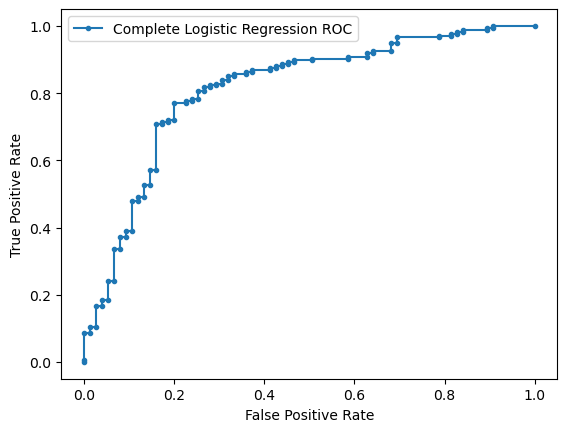

Complete AUC: 0.813

Reduced Model Accuracy: 0.780


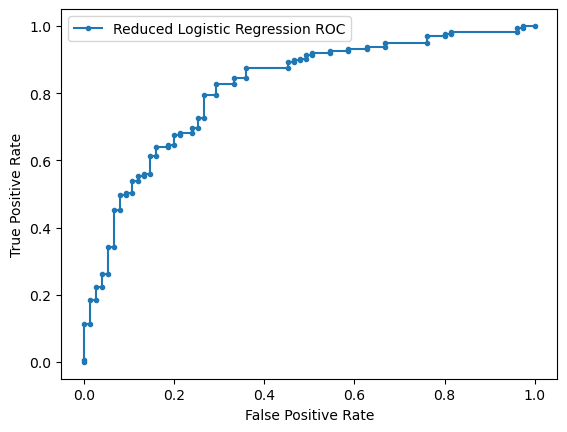

Reduced AUC: 0.816



In [4]:
#%% Step 4 - plot an ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print("\nComplete Model Accuracy: %.3f" %completemodel.score(x_test, y_test))

# predict probabilities
logreg_pred = completemodel.predict_proba(x_test)
# keep probabilities for the positive outcome only
logreg_pred = logreg_pred[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), logreg_pred)
pyplot.plot(fpr, tpr, marker='.', label='Complete Logistic Regression ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate AUC
auc = roc_auc_score(y_test, logreg_pred)
print('Complete AUC: %.3f' % auc)

#to create summary table at the end
from tabulate import tabulate

data = {'LogReg_C': [completemodel.score(x_test, y_test),auc]}
table = pd.DataFrame(data)


del fpr, tpr, auc, thresholds, logreg_pred

print("\nReduced Model Accuracy: %.3f" %reducedmodel.score(x_test_reduced, y_test))
# predict probabilities
logreg_pred = reducedmodel.predict_proba(x_test_reduced)
# keep probabilities for the positive outcome only
logreg_pred = logreg_pred[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), logreg_pred)
pyplot.plot(fpr, tpr, marker='.', label='Reduced Logistic Regression ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate AUC
auc = roc_auc_score(y_test, logreg_pred)
print('Reduced AUC: %.3f\n' % auc)

data = {'LogReg_R': [reducedmodel.score(x_test_reduced, y_test),auc]}
table['LogReg_R'] = pd.DataFrame(data)

del fpr, tpr, auc, thresholds, completemodel, reducedmodel, logreg_pred

<h1 style="font-size:1.5rem;color:blue;">Comparing both complete and reduced we can see that the overall accuracy increased for the reduced model by 0.12 and the AUC increased for reduced by 0.003.The model could be considered to be overfitted as the identifcation for valuable predictors was based off of a small sample from the total x, resulting in the model predicting itself better than otherwise.</h1>

# Problem 2

Analyze the dataset in Problem 1 using LQA and QDA. You should report:<br>
• Summary of each model<br>
• The ROC curve and the AUC of each model<br>

Linear Discriminant Analysis Results:
status Score: 0.56428
duration Score: -0.03018
credit_history Score: 0.38143
purpose Score: 0.02105
amount Score: -0.00010
savings Score: 0.24615
employment_duration Score: 0.11495
installment_rate Score: -0.31869
personal_status_sex Score: 0.26681
other_debtors Score: 0.28579
present_residence Score: 0.03639
property Score: -0.14676
age Score: 0.00767
other_installment_plans Score: 0.15089
housing Score: 0.24557
number_credits Score: -0.22445
job Score: 0.01083
people_liable Score: -0.03183
telephone Score: 0.39567
foreign_worker Score: -0.74265


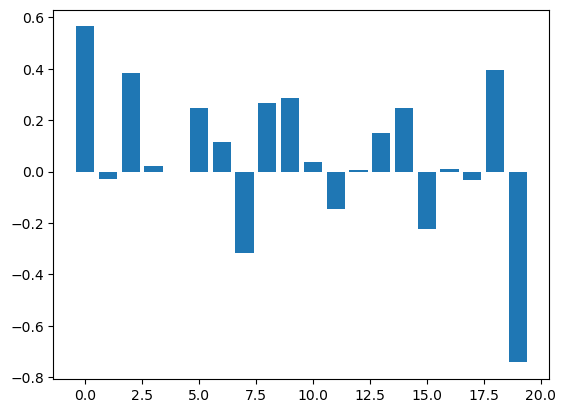

Shows that the coefficients are the same for LDA as in Logistic Regression, meaning we can use the same reduced model.

Complete LDA Model Accuracy: 0.776


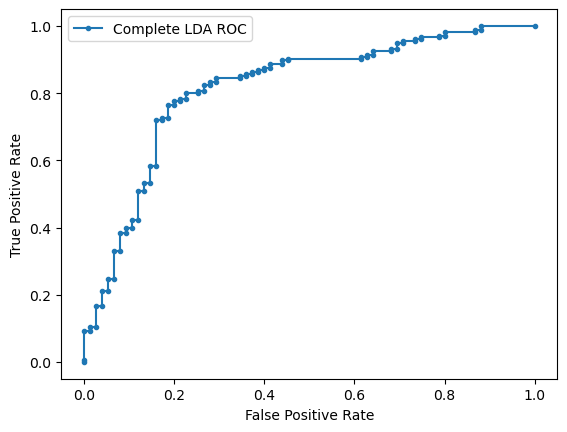

Complete AUC: 0.815

Reduced LDA Model Accuracy: 0.780


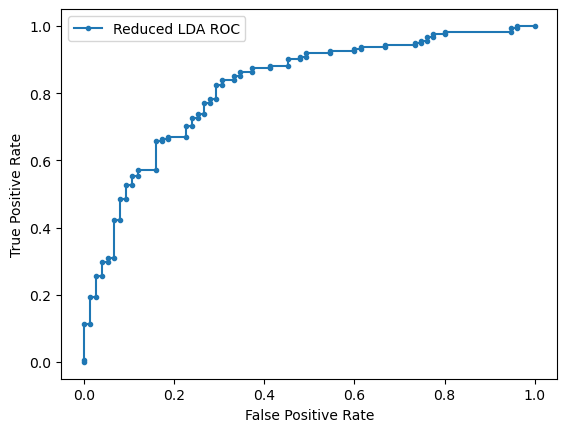

Reduced AUC: 0.818

Quadratic Discriminant Analysis Results:
Cannot show coef results because QDA does not have the attributing function.

Complete QDA Model Accuracy: 0.760


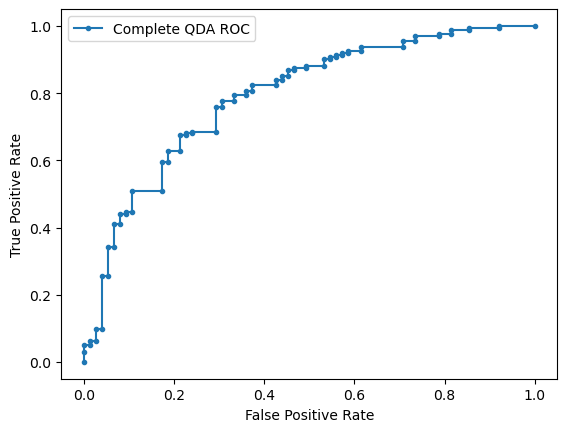

Complete AUC: 0.791

Reduced QDA Model Accuracy: 0.736


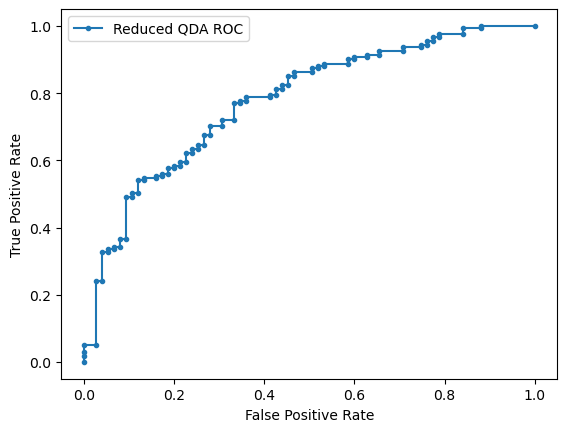

Reduced AUC: 0.778



In [5]:
#%% Step 5 - LDA
print("Linear Discriminant Analysis Results:")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Model Summary
completelda = LinearDiscriminantAnalysis().fit(x_train, y_train)
importance = completelda.coef_[0]
for i,v in enumerate(importance):
	print(colnames[i],'Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

print("Shows that the coefficients are the same for LDA as in Logistic Regression, meaning we can use the same reduced model.")
del i, v, importance

reducedlda = LinearDiscriminantAnalysis().fit(x_train_reduced, y_train)
#ROC and AUC for complete and reduced
print("\nComplete LDA Model Accuracy: %.3f" %completelda.score(x_test, y_test))

# predict probabilities
logreg_pred = completelda.predict_proba(x_test)
# keep probabilities for the positive outcome only
logreg_pred = logreg_pred[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), logreg_pred)
pyplot.plot(fpr, tpr, marker='.', label='Complete LDA ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate AUC
auc = roc_auc_score(y_test, logreg_pred)
print('Complete AUC: %.3f' % auc)

data = {'LDA_C': [completelda.score(x_test, y_test),auc]}
table['LDA_C'] = pd.DataFrame(data)

del fpr, tpr, auc, thresholds, logreg_pred

print("\nReduced LDA Model Accuracy: %.3f" %reducedlda.score(x_test_reduced, y_test))
# predict probabilities
logreg_pred = reducedlda.predict_proba(x_test_reduced)
# keep probabilities for the positive outcome only
logreg_pred = logreg_pred[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), logreg_pred)
pyplot.plot(fpr, tpr, marker='.', label='Reduced LDA ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate AUC
auc = roc_auc_score(y_test, logreg_pred)
print('Reduced AUC: %.3f\n' % auc)

data = {'LDA_R': [reducedlda.score(x_test_reduced, y_test),auc]}
table['LDA_R'] = pd.DataFrame(data)
del fpr, tpr, auc, thresholds, logreg_pred, completelda, reducedlda
#%% Step 6 QDA
print("Quadratic Discriminant Analysis Results:")
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Model Summary
completeqda = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
print("Cannot show coef results because QDA does not have the attributing function.")

reducedqda = QuadraticDiscriminantAnalysis().fit(x_train_reduced, y_train)
#ROC and AUC for complete and reduced
print("\nComplete QDA Model Accuracy: %.3f" %completeqda.score(x_test, y_test))

# predict probabilities
logreg_pred = completeqda.predict_proba(x_test)
# keep probabilities for the positive outcome only
logreg_pred = logreg_pred[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), logreg_pred)
pyplot.plot(fpr, tpr, marker='.', label='Complete QDA ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate AUC
auc = roc_auc_score(y_test, logreg_pred)
print('Complete AUC: %.3f' % auc)
data = {'QDA_C': [completeqda.score(x_test, y_test),auc]}
table['QDA_C'] = pd.DataFrame(data)
del fpr, tpr, auc, thresholds, logreg_pred

print("\nReduced QDA Model Accuracy: %.3f" %reducedqda.score(x_test_reduced, y_test))
# predict probabilities
logreg_pred = reducedqda.predict_proba(x_test_reduced)
# keep probabilities for the positive outcome only
logreg_pred = logreg_pred[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test.astype('int32'), logreg_pred)
pyplot.plot(fpr, tpr, marker='.', label='Reduced QDA ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate AUC
auc = roc_auc_score(y_test, logreg_pred)
print('Reduced AUC: %.3f\n' % auc)
data = {'QDA_R': [reducedqda.score(x_test_reduced, y_test),auc]}
table['QDA_R'] = pd.DataFrame(data)
del fpr, tpr, auc, thresholds, logreg_pred, completeqda, reducedqda

• The comparison among LDA, QDA and logistic regression

<h1 style="font-size:1.5rem;color:blue;">Comparing LogReg (Logistic Regression), LDA (Linear Discriminant Analysis), and QDA (Quadratic Discrimninant Analysis) we can begin with the numerical results below.</h1>

In [6]:
print(tabulate(table, headers='keys',tablefmt='fancy_grid',showindex=["Accuracy","AUC"]))

╒══════════╤════════════╤════════════╤══════════╤══════════╤══════════╤══════════╕
│          │   LogReg_C │   LogReg_R │    LDA_C │    LDA_R │    QDA_C │    QDA_R │
╞══════════╪════════════╪════════════╪══════════╪══════════╪══════════╪══════════╡
│ Accuracy │     0.768  │   0.78     │ 0.776    │ 0.78     │ 0.76     │ 0.736    │
├──────────┼────────────┼────────────┼──────────┼──────────┼──────────┼──────────┤
│ AUC      │     0.8128 │   0.815924 │ 0.815086 │ 0.818438 │ 0.790552 │ 0.777676 │
╘══════════╧════════════╧════════════╧══════════╧══════════╧══════════╧══════════╛


<h1 style="font-size:1.5rem;color:blue;">We can see that the accuracy of the model increases in both reduced models of Logistic Regression and LDA, both having the greatest accuracy across tests. As well QDA having a lower overall accuracy, lowest in the reduced model. We also see reduced LDA having the highest AUC, with both AUC for LDA Complete and Reduced having .003 higher AUC, when rounded to 3 decimal places. Although Logistic Regression is typically superior for categorical data, such as the one provided, it can be inferred that the model is overfitted for LDA yielding "better" results, or in other terms LDA is overfitted to predict its own data with a higher AUC.<br>

Comparing the ROC curves can show that the Logistic Regression curve appears smoother or more gradual when using the reduced model. This observation continues for LDA and QDA. In particular the 0.0 - 0.2 range for FPR yields a greater TPR for all reduced models.</h1>